# Processing ATTO leaf flushing data
- PI: Bruce W. Nelson
- Raw data processing: Davieliton Pinho and Giordane Martins
- Flushing to leaf age and LAI classes: Santiago Botía and Eliane Gomes-Alves
- This script was written by: Santiago Botía

### Description
- This code is accompanied by datasets 223 and 230 from the https://www.attodata.org/
- Both datasets are available freely and each contain a README file explaining further the assumptions and as well as the methods.
- This script reads in dataset 223 and produces 230. It also has the option to produce LAI age classes based on assumptions explained in the README files as well as in the paper:
    - https://onlinelibrary.wiley.com/doi/full/10.1111/gcb.15905

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as tck
import datetime

## 1. Overview of leaf flushing dataset (223)
- general overview of the dataset, and basic stats

In [40]:
# Reading data
binning          = '4classes' # Options are: 4classes or 13classes, this defines the binning used for the age classes. 
# this is a flag for asking normalized data (True), or if False, to get the number of individuals instead of fractions
# If doPercent is True, the normalized dataset will have a column called unknown.
doPercent        = False       
# change the name below accordingly it should be dataset 223 on data portal
path_dataset_223 = './ATTO_leaf_phenology_raw_dataset_2013-07_2018-11.csv' 

In [41]:
data             = pd.read_csv(path_dataset_223) 
data['Date']     = pd.to_datetime(data['Date']) # converting to datetime
data.head(10)

,ID,Family,Specie,Year,Month,Day,Event,Date,Pheno type
0,1,Lecythidaceae,Eschweilera pedicellata (Rich.) S.A.Mori,2014,7,6,init_flush,2014-07-06,semiBD
1,1,Lecythidaceae,Eschweilera pedicellata (Rich.) S.A.Mori,2016,7,27,abscission,2016-07-27,semiBD
2,1,Lecythidaceae,Eschweilera pedicellata (Rich.) S.A.Mori,2016,8,4,init_flush,2016-08-04,semiBD
3,1,Lecythidaceae,Eschweilera pedicellata (Rich.) S.A.Mori,2018,7,4,abscission,2018-08-04,semiBD
4,1,Lecythidaceae,Eschweilera pedicellata (Rich.) S.A.Mori,2018,8,4,init_flush,2018-08-04,semiBD
5,8,Sapotaceae,Chrysophyllum argenteum Jacq.,2014,7,22,init_flush,2014-07-22,EV
6,8,Sapotaceae,Chrysophyllum argenteum Jacq.,2015,7,15,init_flush,2015-07-15,EV
7,8,Sapotaceae,Chrysophyllum argenteum Jacq.,2016,8,20,init_flush,2016-08-20,EV
8,8,Sapotaceae,Chrysophyllum argenteum Jacq.,2017,7,17,init_flush,2017-07-17,EV
9,8,Sapotaceae,Chrysophyllum argenteum Jacq.,2018,8,8,init_flush,2018-08-08,EV


In [42]:
data['Date'].min(),data['Date'].max()

(Timestamp('2013-07-04 00:00:00'), Timestamp('2018-11-08 00:00:00'))

### Note:
- The original dataset has an ID identifying each individual, the species name, the family name and a date associated with an event, either initial flushing date or abscission.

In [43]:
print('number of individuals in this dataset =',len(list(set(data['ID'].values))))
print('number of species in dataset =',len(list(set(data['Specie'].values))))

number of individuals in this dataset = 134
number of species in dataset = 100


### A summary of the pheno types in the data is shown below

Phenological types  {'semiEV', 'BD', 'semiBD', 'EV'}
 


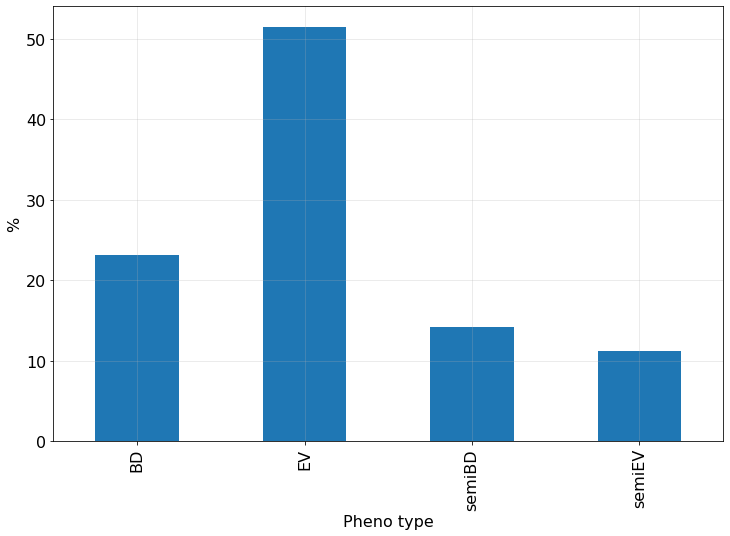

In [44]:
print('Phenological types ', set(data['Pheno type'].values))
print(' ')
pheno_types = data.drop_duplicates(subset='ID').groupby('Pheno type')['ID'].count()
pheno_types_percent = (pheno_types/pheno_types.sum())*100

pheno_types_percent.plot(kind='bar',figsize=(12,8),fontsize=16)

plt.xlabel('Pheno type',fontsize=16)
plt.ylabel('%',fontsize=16)
plt.grid(alpha=0.3)
plt.show()

In [45]:
# function for selecting randomly an individual form the dataset
def get_random_ind(df,pheno='EV'):
    EV  = np.array(list(set(df[df['Pheno type']=='EV']['ID'].values)))
    nEV = np.array(list(set(df[df['Pheno type']=='semiEV']['ID'].values)))
    BD  = np.array(list(set(df[df['Pheno type']=='BD']['ID'].values)))
    nBD = np.array(list(set(df[df['Pheno type']=='semiBD']['ID'].values)))
    if pheno == 'EV':
        tree_num = np.random.choice(EV)
    elif pheno == 'semiEV':
        tree_num = np.random.choice(nEV)
    elif pheno == 'BD':    
        tree_num = np.random.choice(BD)
    elif pheno == 'semiBD':
        tree_num = np.random.choice(nBD)
    return tree_num

In [46]:
print('Individuals in BD \n',set(data[data['Pheno type']=='BD']['ID'].values))

Individuals in BD 
 {129, 130, 140, 142, 27, 29, 31, 164, 37, 41, 181, 62, 63, 64, 65, 193, 68, 73, 79, 80, 210, 88, 90, 96, 225, 101, 105, 110, 111, 114, 126}


In [47]:
print('individuals in nBD \n',set(data[data['Pheno type']=='semiBD']['ID'].values))

individuals in nBD 
 {1, 150, 159, 179, 53, 182, 60, 189, 190, 194, 200, 84, 212, 217, 92, 221, 99, 229, 125}


In [48]:
print('individuals in EV \n',set(data[data['Pheno type']=='EV']['ID'].values))

individuals in EV 
 {131, 133, 134, 135, 8, 138, 143, 149, 23, 151, 152, 154, 28, 33, 163, 165, 166, 169, 175, 48, 49, 50, 51, 177, 180, 54, 55, 56, 183, 184, 59, 185, 186, 187, 188, 66, 67, 70, 71, 72, 199, 76, 77, 78, 204, 207, 208, 82, 211, 215, 89, 91, 220, 222, 95, 223, 98, 226, 100, 228, 102, 103, 232, 106, 107, 116, 119, 120, 123}


In [49]:
print('individuals in nEV \n',set(data[data['Pheno type']=='semiEV']['ID'].values))

individuals in nEV 
 {35, 122, 158, 202, 75, 109, 173, 144, 93, 117, 87, 58, 155, 61, 94}


## How do the flushing patterns look like for each pheno type?
- play with the get_random_ind function (BD,semiBD,EV,and semiEV) below to see for a random selection of an individual in each pheno type, how does it look.

- In general:

    - EV = Evergreen, species that remain green always but they have detectable flushes, with at least four over the sampling record.

    - semiEV = same as EV, but they flush maximum three times over the entire record.

    - BD = brevidecidous, species that have a brief abscissed stage (bare) followed by flushing, approximately every year

    - semiBD = semi-brevidecidous, species that have a brief abscissed stage (bare) followed by flushing, but the difference with BD is that the flushing-abscission dynamics is irregular.

,ID,Family,Specie,Year,Month,Day,Event,Date,Pheno type
61,35,Lecythidaceae,Lecythis chartacea O.Berg,2014,9,27,init_flush,2014-09-27,semiEV
62,35,Lecythidaceae,Lecythis chartacea O.Berg,2017,6,16,init_flush,2017-06-16,semiEV
63,35,Lecythidaceae,Lecythis chartacea O.Berg,2018,6,20,init_flush,2018-06-20,semiEV


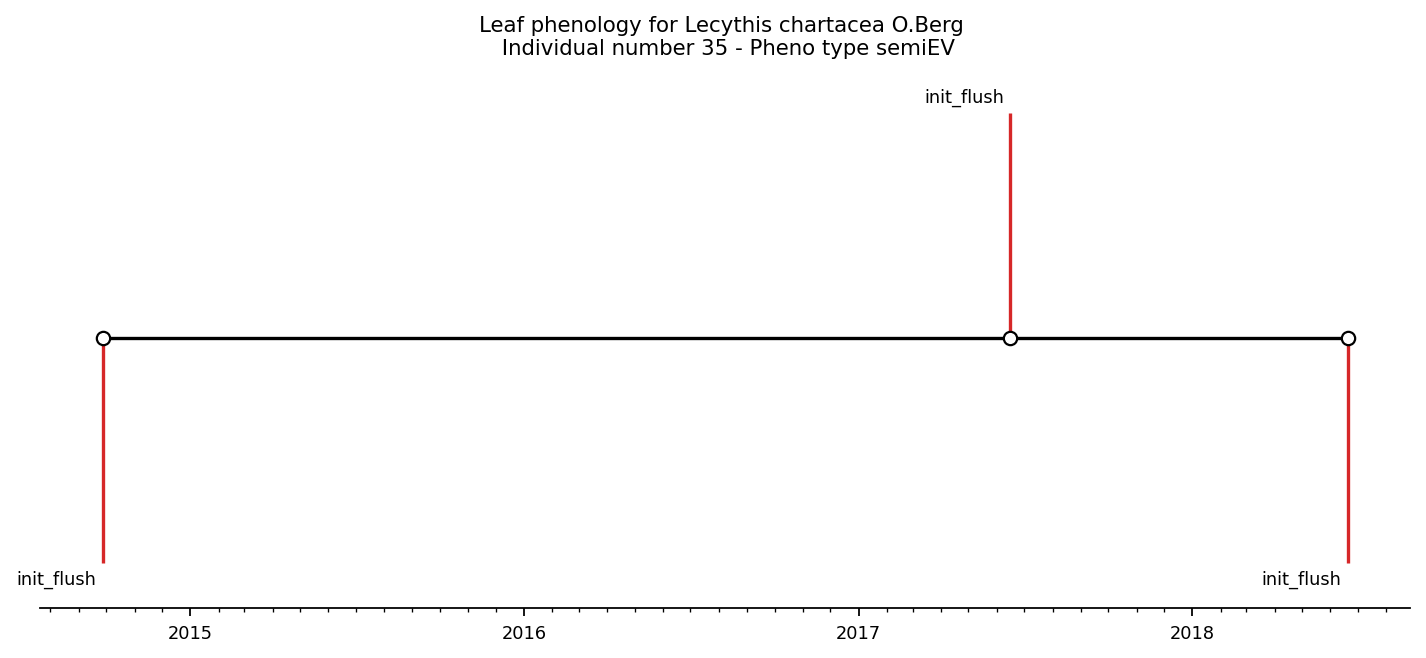

In [50]:
# randomly selecting an individual from a pheno type
# the bars in the plot represent the event, the width and height have no meaning

################## You can select between semiBD, BD, EV or semiEV
wanted_phenotype = 'semiEV' 
##################

tree = get_random_ind(data,pheno=wanted_phenotype) 
display(data[data['ID']==tree].sort_values(by=['Year','Month'])) # displaying the data for the individual

# Plotting
# setting the dates properly so it can be plotted and other details
datesi  = data[data['ID']==tree].sort_values(by=['Year','Month'])['Date'].astype(str).values
datesf  = [datetime.datetime.strptime(str(d), "%Y-%m-%d") for d in datesi]                                               
names   =  list(data[data['ID']==tree].sort_values(by=['Year','Month'])['Event'].astype(str).values)
sp      = list(set(data[data['ID']==tree]['Specie']))[0]
ind_num = list(set(data[data['ID']==tree]['ID']))[0]

# selecting levels for the height of the lines in plot
levels = np.tile([-2, 2, -2, 2, -2, 2],int(np.ceil(len(datesf)/6)))[:len(datesf)] # same height adjust

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), dpi=160,constrained_layout=True)

ax.set(title="Leaf phenology for %s \n Individual number %i - Pheno type %s"%(sp,ind_num,wanted_phenotype))
ax.vlines(datesf, 0, levels, color="tab:red")  # The vertical stems.
ax.plot(datesf, np.zeros_like(datesf), "-o",color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(datesf, levels, names):
    ax.annotate(r, xy=(d, l),xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",verticalalignment="bottom" if l > 0 else "top")
    
# remove y axis and spines
ax.yaxis.set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

years     = mdates.YearLocator()   # every year
months    = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

ax.margins(y=0.1)
plt.show()
#fig.savefig('flushing_patterns.png',bbox_inches='tight',dpi=180)

# 2. Data processing for leaf age estimation

In [51]:
# creating flags for flush or abscission
data['FlushFlag'] = data['Event'] == 'init_flush'
data['QFlag']     = data['Event'] == 'abscission'
flushing          = data[data['FlushFlag']==True]
queda             = data[data['QFlag']==True] 

In [52]:
queda.head(2)

,ID,Family,Specie,Year,Month,Day,Event,Date,Pheno type,FlushFlag,QFlag
1,1,Lecythidaceae,Eschweilera pedicellata (Rich.) S.A.Mori,2016,7,27,abscission,2016-07-27,semiBD,False,True
3,1,Lecythidaceae,Eschweilera pedicellata (Rich.) S.A.Mori,2018,7,4,abscission,2018-08-04,semiBD,False,True


In [53]:
flushing.head(2)

,ID,Family,Specie,Year,Month,Day,Event,Date,Pheno type,FlushFlag,QFlag
0,1,Lecythidaceae,Eschweilera pedicellata (Rich.) S.A.Mori,2014,7,6,init_flush,2014-07-06,semiBD,True,False
2,1,Lecythidaceae,Eschweilera pedicellata (Rich.) S.A.Mori,2016,8,4,init_flush,2016-08-04,semiBD,True,False


In [54]:
# this is to get some stats on the amount of flush and abs in the data for each pheno type
abs_gp = pd.DataFrame(queda.groupby('ID')['Event'].count())
abs_gp.sort_index(ascending=True,inplace=True)
abs_gp.reset_index(inplace=True)

# this dataframe is used to generate the plot of total flush events for each individual
flushing_gp = pd.DataFrame(flushing.groupby('ID')['Event'].count())
flushing_gp.sort_index(ascending=True,inplace=True)
flushing_gp.reset_index(inplace=True)

non_repeat_pheno_type = flushing[['ID','Pheno type']].drop_duplicates()
non_repeat_pheno_type.sort_values(by='ID',inplace=True)
#display(non_repeat_pheno_type.head(2))

In [55]:
flushing_gp['Pheno type'] = non_repeat_pheno_type['Pheno type'].values
flushing_gp.columns = ['ID','numFlush','Pheno type']
flsh_abs_df = pd.merge(flushing_gp,abs_gp,on='ID',how='left')
flsh_abs_df.columns = ['ID','numFlush','Pheno type','numAbs']
flsh_abs_df.head(6)

,ID,numFlush,Pheno type,numAbs
0,1,3,semiBD,2.0
1,8,5,EV,NaN
2,23,6,EV,NaN
3,27,5,BD,5.0
4,28,6,EV,NaN
5,29,6,BD,6.0


In [56]:
# stats on flush and abs
flsh_abs_df.groupby('Pheno type').agg(['mean','min','max'])[['numFlush','numAbs']]

numFlush            numAbs          
                mean min max      mean  min  max
Pheno type                                      
BD          5.580645   4   7  5.225806  4.0  7.0
EV          5.217391   4   8       NaN  NaN  NaN
semiBD      4.210526   2   7  1.842105  1.0  3.0
semiEV      2.800000   2   3       NaN  NaN  NaN

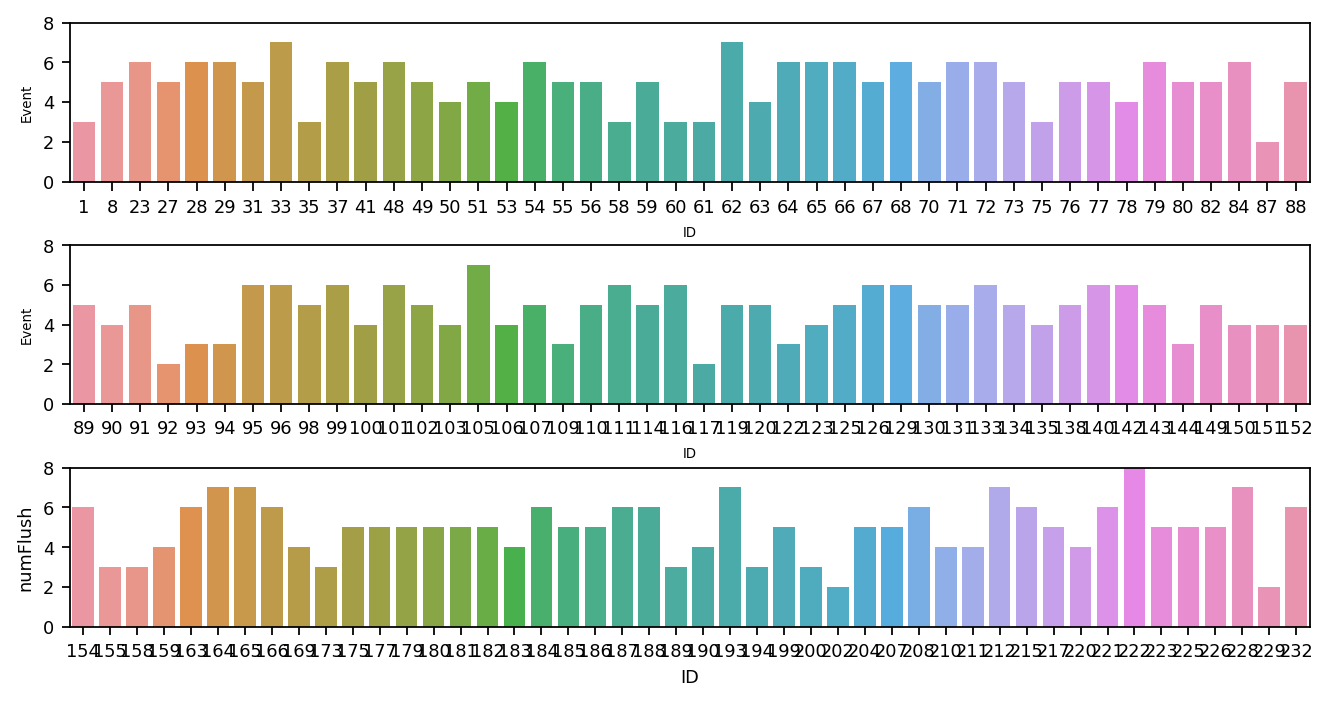

In [57]:
# Visualizing number of flushing events per individual
import matplotlib as mpl
fig,(ax,ax1,ax2)  = plt.subplots(3,1,figsize=(10,5),dpi=160)

sns.barplot(x='ID',y='numFlush',data=flushing_gp.iloc[0:44,:],ax=ax)
sns.barplot(x='ID',y='numFlush',data=flushing_gp.iloc[44:88,:],ax=ax1)
sns.barplot(x='ID',y='numFlush',data=flushing_gp.iloc[88:,:],ax=ax2)

ax.set_ylabel('Event',fontsize=6)
ax1.set_ylabel('Event',fontsize=6)

ax.xaxis.set_tick_params(size=4)

ax.set_xlabel('ID',fontsize=6)
ax1.set_xlabel('ID',fontsize=6)

ax.set_ylim(0,8)
ax1.set_ylim(0,8)
ax2.set_ylim(0,8)

mpl.rcParams['font.size'] = 5
plt.subplots_adjust(hspace=0.4)
plt.show()
#fig.savefig('IndFlushing_alltimes.png',dpi=200,bbox_inches='tight')

## Main loop where ages are calculated for each individual 

In [58]:
ids     = list(set(flushing['ID'].values))
print('Number of trees that flush',len(ids))

Number of trees that flush 134


In [59]:
dfall   = pd.DataFrame()

# looping over each individual that flushes
for i,idx in enumerate(ids):
    
    print('================= counter ================= ',i)
    
    # getting the dates in the record, the last date of each individual
    # and setting 2018-11 as the last date of reference.
    fdate                      = flushing.loc[flushing['ID']==idx,['Date','Specie','Pheno type']].sort_values(by='Date') # getting the flushing dates
    mean_days_between_flushing = fdate['Date'].diff().mean() # the mean time between flushing events
    last_date                  = pd.to_datetime(fdate['Date'].values[-1]) 
    # Assumed to be one month later than the actual last month. 
    # This to enables an age attribution to indivuals that flush in 2018-11
    last_obs_month             = pd.to_datetime('2018-12') 
    
    print('ind num',idx,set(fdate['Specie']),'\n')
    print('===== original dates in record',fdate['Date'].values,'\n')
    
    df_sp = pd.DataFrame()
    
    # looping over the dates for each individual to calculate the leaf age
    for j,dran in enumerate(fdate['Date'].values,start=1):
        
        # if the date in the loop is the last date then I take 2018-11 as a reference to 
        # finish counting
        if dran==last_date: 
            months_between_events = pd.date_range(dran,last_obs_month,freq='M')
            months                = [i.month for i in months_between_events]
            
            # creating a temporal dataframe to count the months between events
            fr                    = pd.DataFrame()
            fr['dates']           = months_between_events
            fr['age_in_month']    = months
            fr.set_index('dates',inplace=True)

            # counting the cumulative months between events and gathering more data
            age_in_month                     = fr.groupby([fr.index.year,fr.index.month]).count()
            age_in_month.index.names         = ['year','month']
            age_in_month['age_in_month_cum'] = age_in_month.cumsum()
            age_in_month['ID']               = idx
            age_in_month['Specie']           = list(set(fdate['Specie']))[0]
            age_in_month['Pheno type']       = list(set(fdate['Pheno type']))[0]
            age_in_month.reset_index(inplace=True)
            
            print('[this is projected taking last month as reference] flushing events from',dran,'to',last_obs_month)

        else: # This else is for all the other dates before the last one.
            months_between_events = pd.date_range(dran,fdate['Date'].values[j],freq='M')
            months                = [i.month for i in months_between_events]

            # creating a temporal dataframe to count the months between events
            fr                    = pd.DataFrame()
            fr['dates']           = months_between_events
            fr['age_in_month']    = months
            fr.set_index('dates',inplace=True)

            # counting the cumulative months between events and gathering more data
            age_in_month = fr.groupby([fr.index.year,fr.index.month]).count()
            age_in_month.index.names = ['year','month']
            age_in_month['age_in_month_cum'] = age_in_month.cumsum()
            age_in_month['ID']    = idx
            age_in_month['Specie']    = list(set(fdate['Specie']))[0]
            age_in_month['Pheno type'] = list(set(fdate['Pheno type']))[0]
            age_in_month.reset_index(inplace=True)
            
            print('[observed flushing events] flushing events from',dran,'to',fdate['Date'].values[j])

        if j == 1:
            df_sp = age_in_month
        else:
            df_sp = pd.concat([df_sp,age_in_month],axis=0)
    
    # concatening the information for each ind into one dataframe
    if i == 0:
        dfall = df_sp
    else:
        dfall = pd.concat([dfall,df_sp],axis=0)
        
    print('\n')

================= counter =================  0
ind num 1 {'Eschweilera pedicellata\xa0(Rich.) S.A.Mori'} 

===== original dates in record ['2014-07-06T00:00:00.000000000' '2016-08-04T00:00:00.000000000'
 '2018-08-04T00:00:00.000000000'] 

[observed flushing events] flushing events from 2014-07-06T00:00:00.000000000 to 2016-08-04T00:00:00.000000000
[observed flushing events] flushing events from 2016-08-04T00:00:00.000000000 to 2018-08-04T00:00:00.000000000
[this is projected taking last month as reference] flushing events from 2018-08-04T00:00:00.000000000 to 2018-12-01 00:00:00


================= counter =================  1
ind num 8 {'Chrysophyllum argenteum\xa0Jacq.'} 

===== original dates in record ['2014-07-22T00:00:00.000000000' '2015-07-15T00:00:00.000000000'
 '2016-08-20T00:00:00.000000000' '2017-07-17T00:00:00.000000000'
 '2018-08-08T00:00:00.000000000'] 

[observed flushing events] flushing events from 2014-07-22T00:00:00.000000000 to 2015-07-15T00:00:00.000000000
[observe

#### The resulting dataframe looks like 

In [60]:
#dfall.head(),
dfall.shape

(7806, 7)

### Creating bins for age classes depending on the binning type selected above

In [61]:
def mid(interval):
    return interval.mid

if binning == '13classes':
    
    bins    = [np.arange(0,12,1),np.linspace(12,52,2)]
    bins    = np.concatenate(bins).ravel()
    print('bins used are =' ,bins)
    dfall   = dfall.assign(AgeClasses_months = pd.cut(dfall['age_in_month_cum'],bins,right=True))
    dfall   = dfall.assign(AgeMid = dfall.AgeClasses_months.apply(mid))
    
    columns = [ '1 mo','2 mo', '3 mo', '4 mo', '5 mo', '6 mo', '7 mo', '8 mo', '9 mo','10 mo','11 mo', '12 mo', '>12 mo']

elif binning == '4classes':
    bins    = [np.linspace(0,2,1),np.linspace(2,6,1),
           np.linspace(6,11,1),
           np.linspace(12,dfall['age_in_month_cum'].max(),2)]
    bins    = np.concatenate(bins).ravel()
    print('bins used are =' ,bins)
    dfall   = dfall.assign(AgeClasses_months = pd.cut(dfall['age_in_month_cum'],bins,right=True))
    dfall   = dfall.assign(AgeMid = dfall.AgeClasses_months.apply(mid))
    
    columns =  ['Young [0-2 mo]','Mature [2-6 mo]', 'Old [6-12 mo]', 'Old+ [>12 mo]']
    
# creating a datetime index
dfall['dates'] = pd.to_datetime(['%s-%s'%(yr,dfall.month.values[i]) for i,yr in enumerate(dfall.year.values)])
dfall.set_index('dates',inplace=True)
dfall.sort_index(inplace=True)
dfall.head(3)

bins used are = [ 0.  2.  6. 12. 51.]


,year,month,age_in_month,age_in_month_cum,ID,Specie,Pheno type,AgeClasses_months,AgeMid
dates,,,,,,,,,
2013-07-01,2013,7,1,1,23,Manilkara huberi (Ducke) Standl.,EV,"(0.0, 2.0]",1.0
2013-07-01,2013,7,1,1,199,Pouteria cuspidata? (A.DC.) Baehni,EV,"(0.0, 2.0]",1.0
2013-07-01,2013,7,1,1,179,Eschweilera bracteosa (Poepp. ex O.Berg) Miers,semiBD,"(0.0, 2.0]",1.0


,ID,Family,Specie,Year,Month,Day,Event,Date,Pheno type,FlushFlag,QFlag
554,144,Lecythidaceae,Eschweilera pedicellata (Rich.) S.A.Mori,2014,5,29,init_flush,2014-05-29,semiEV,True,False
555,144,Lecythidaceae,Eschweilera pedicellata (Rich.) S.A.Mori,2015,8,4,init_flush,2015-08-04,semiEV,True,False
556,144,Lecythidaceae,Eschweilera pedicellata (Rich.) S.A.Mori,2017,6,15,init_flush,2017-06-15,semiEV,True,False


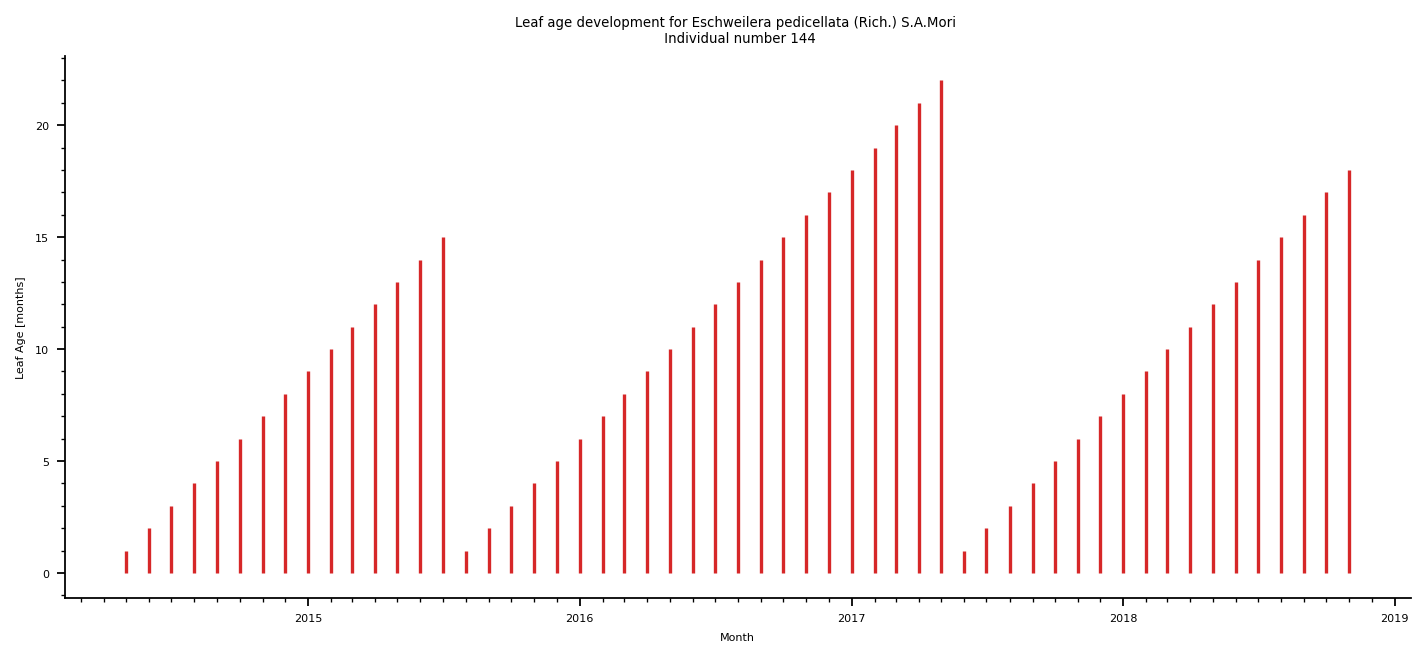

In [62]:
# displaying the ages for a random individual including the projected time period

################## You can select between semiBD, BD, EV or semiEV and run multiple times to check
################## different individuals
wanted_phenotype = 'semiEV' 
##################

tree   = get_random_ind(dfall,pheno=wanted_phenotype) 
dfplot = dfall[dfall['ID']==tree] 

display(data[data['ID']==tree]) # displaying the data for the individual

# Plotting
# setting the dates properly so it can be plotted and other details
datesi  = dfplot.reset_index().sort_values(by=['year','month'])['dates'].astype(str).values
datesf  = [datetime.datetime.strptime(str(d), "%Y-%m-%d") for d in datesi]                                               
names   = ['Lancamento'] * len(datesf)
sp      = list(set(dfplot['Specie']))[0]
ind_num = list(set(dfplot['ID']))[0]
#lastObs = dfplot[dfplot['ProjectionFlag']==True].index[0]
lastObs = dfplot.index[-1]

# selecting levels for the height of the lines in plot
levels  = dfplot['age_in_month_cum'].values

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), dpi=160,constrained_layout=True)

ax.set(title="Leaf age development for %s \n Individual number %i"%(sp,ind_num))
ax.vlines(datesf, 0, levels, color="tab:red")  # The vertical stems.
#ax.axvspan(str(lastObs),'2019-06',color='grey',alpha=.2)
    
# remove y axis and spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.set_xlabel('Month')
ax.set_ylabel('Leaf Age [months]')

years     = mdates.YearLocator()   # every year
months    = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

plt.show()

### Getting rid of duplicates
- In the original dataset there are individuals that are reported twice within a same month. 
- So to calculate the age classes we need to avoid counting twice each tree, because this will affect the fraction of crowns flushing for that month.  So, we have to get rid of these extra counts in those months.

In [63]:
dates_loop  = sorted(list(set(dfall.index)))
dfall_nodup = pd.DataFrame()
printme     = False

for i in dates_loop[:67]:
    shape_origi = dfall.loc[i].shape[0]
    shape_drop  = dfall.loc[i,'ID'].drop_duplicates().shape[0]
    
    if printme: print(dfall.loc[i].shape,i,dfall.loc[i,'ID'].drop_duplicates().shape)
    
    if shape_origi==shape_drop:
        dfall_nodup = pd.concat([dfall.loc[i,:],dfall_nodup],axis=0)
    else:
        dfall_nodup = pd.concat([dfall_nodup,dfall.loc[i,:].drop_duplicates(subset='ID')])

In [64]:
dfall_nodup.shape

(7789, 9)

In [65]:
# Organzing the resulting dataframe to have months classes in the columns and the dates of the time series in the rows.
df_ages_ts = dfall_nodup.pivot_table(values='AgeMid',columns='AgeClasses_months',index=['year','month'],aggfunc='count')
df_ages_ts.columns = columns

if doPercent:
    # Note that the Unknown class is only created if doPercent is True
    df_ages_ts = df_ages_ts / 134 # 134 is the total of flushing tress, I divide to get the percentage for each month
    # Adding the "Unknown class" 
    df_ages_ts['Unknown'] = 1-df_ages_ts.sum(axis=1)
else:
    df_ages_ts = df_ages_ts

df_ages_ts.reset_index(inplace=True)
df_ages_ts['dates'] = pd.to_datetime(['%s-%s'%(yr,df_ages_ts.month.values[i]) for i,yr in enumerate(df_ages_ts.year.values)])
df_ages_ts.set_index('dates',inplace=True)
df_ages_ts.sort_index(inplace=True)
df_ages_ts.head(13)

,year,month,Young [0-2 mo],Mature [2-6 mo],Old [6-12 mo],Old+ [>12 mo]
dates,,,,,,
2013-01-01,2013,1,0,0,0,0
2013-02-01,2013,2,0,0,0,0
2013-03-01,2013,3,0,0,0,0
2013-04-01,2013,4,0,0,0,0
2013-05-01,2013,5,0,0,0,0
2013-06-01,2013,6,0,0,0,0
2013-07-01,2013,7,18,0,0,0
2013-08-01,2013,8,39,0,0,0
2013-09-01,2013,9,27,18,0,0


## Note on previous dataframe:
- See that the diagonal sometimes decreases. For example from rows 2013-12-01 to 2014-01-01 there is a decrease in the percentage of the upper diagonal.
- This is because one of the trees in this group, flushed again. Therefore, the timing is renewed and this individual enters the 1-month age class.
- It is normal that the diagonal decreases because fo the mentioned effect, but it should never increase.

In [66]:
if doPercent:
    fig,ax2  = plt.subplots(1,1,figsize=(9,4),dpi=160)
    
    cols=df_ages_ts.columns[2:]
    df_ages_ts[cols].plot(kind='bar',stacked=True,ax=ax2,cmap='gist_earth') # nipy_spectral,gist_earth,gist_ncar

    ticklabels = ['']*len(df_ages_ts.index)
    # Every 4th ticklable shows the month and day
    ticklabels[::2] = [item.strftime('%b %Y') for item in df_ages_ts.index[::2]]
    ax2.xaxis.set_major_formatter(tck.FixedFormatter(ticklabels))
    ax2.legend(bbox_to_anchor=(0.1,0.4),ncol=1,fontsize=6,title='Age Classes')
    ax2.set_ylabel('Fraction of crowns (n=134)')
    ax2.set_xlabel('Date')
    ax2.set_xlim(-0.5,64.5)
    plt.tight_layout()
    plt.rcParams.update({'font.size': 8,})
    plt.show()
    #fig.savefig('fraction_crowns_%s_201811ref.png'%(binning),dpi=200)

## 3. LAI Normalization
- This is done only if binning == '4classes' and doPercent == False
- The reason is that for the LAI normalization we worked with the 194 individuals and thus we used the number of individuals

In [67]:
if binning == '4classes' and doPercent==False:
    
    pd.options.mode.chained_assignment = None
    
    # getting the number of individuals in each Pheno type
    deciduous = flushing.set_index('Date')
    deciduous = pd.DataFrame(deciduous.groupby([deciduous.index.year,deciduous.index.month,'Pheno type'])['ID'].count())
    deciduous['dates'] =  pd.to_datetime(['%i-%i'%(m,deciduous.index.get_level_values(level=1)[i]) for i,m in enumerate(deciduous.index.get_level_values(level=0))] )
    deciduous.index.names = ['year','month','pheno']
    deciduous = deciduous.reset_index()
    
    # dataframe for only the BD class
    deciduous_bd_only = deciduous[(deciduous['pheno']=='BD' )]
    deciduous_bd_only.set_index('dates',inplace=True)

    # dataframe for only the BD and semiBD classes
    deciduous_bd_nbd  = deciduous[(deciduous['pheno']=='BD' ) | (deciduous['pheno']=='semiBD')]
    deciduous_bd_nbd  = deciduous_bd_nbd.groupby(by=['year','month']).sum()
    deciduous_bd_nbd['dates'] =  pd.to_datetime(['%i-%i'%(m,deciduous_bd_nbd.index.get_level_values(level=1)[i]) 
                                                 for i,m in enumerate(deciduous_bd_nbd.index.get_level_values(level=0))] )
    deciduous_bd_nbd.reset_index(inplace=True)
    deciduous_bd_nbd.set_index('dates',inplace=True)

    date_i = '%i-%i'%(flushing['Date'].sort_values().iloc[0].year,flushing['Date'].sort_values().iloc[0].month)
    date_e = '%i-%i'%(flushing['Date'].sort_values().iloc[-1].year,flushing['Date'].sort_values().iloc[-1].month)
    dtr    = pd.date_range(date_i, date_e, freq='MS')
    print(date_i,date_e,dtr.shape)
    s      = pd.Series(index=dtr)

    # filling with zeros missing dates in deciduos datafrmes
    deciduous_bd_only = pd.concat([deciduous_bd_only,s[~s.index.isin(deciduous_bd_only.index)]]) #.sort_index()
    deciduous_bd_only = deciduous_bd_only.drop([0],axis=1).fillna(0).sort_index()

    deciduous_bd_nbd  = pd.concat([deciduous_bd_nbd,s[~s.index.isin(deciduous_bd_nbd.index)]])
    deciduous_bd_nbd  = deciduous_bd_nbd.drop([0],axis=1).fillna(0).sort_index()

    # LAI normalization 
    df_ages_ts_subset = df_ages_ts.loc['2013-07':'2018-11']
    df_ages_ts_subset['# deciduous BD']        = deciduous_bd_only['ID'].values
    df_ages_ts_subset['# deciduous semiBD + BD']  = deciduous_bd_nbd['ID'].values

    df_ages_ts_subset['TotalGreenCrownBD']        = 194 - df_ages_ts_subset['# deciduous BD']
    df_ages_ts_subset['TotalGreenCrownBD+semiBD'] = 194 - df_ages_ts_subset['# deciduous semiBD + BD']
    df_ages_ts_subset['Old_joinedBD']             = df_ages_ts_subset['TotalGreenCrownBD'] - df_ages_ts_subset['Young [0-2 mo]'] - df_ages_ts_subset['Mature [2-6 mo]']
    df_ages_ts_subset['Old_joinedBD+semiBD']      = df_ages_ts_subset['TotalGreenCrownBD+semiBD'] - df_ages_ts_subset['Young [0-2 mo]'] - df_ages_ts_subset['Mature [2-6 mo]']
    df_ages_ts_subset['Total Canopy LAI']         = 5.32 # Giordane's and Pedro's value

    df_ages_ts_subset['Young LAI BD']             = df_ages_ts_subset['Young [0-2 mo]'] / df_ages_ts_subset['TotalGreenCrownBD'] * df_ages_ts_subset['Total Canopy LAI']
    df_ages_ts_subset['Young LAI BD+semiBD']      = df_ages_ts_subset['Young [0-2 mo]'] / df_ages_ts_subset['TotalGreenCrownBD+semiBD'] * df_ages_ts_subset['Total Canopy LAI']

    df_ages_ts_subset['Mature LAI BD']            = df_ages_ts_subset['Mature [2-6 mo]'] / df_ages_ts_subset['TotalGreenCrownBD'] * df_ages_ts_subset['Total Canopy LAI']
    df_ages_ts_subset['Mature LAI BD+semiBD']     = df_ages_ts_subset['Mature [2-6 mo]'] / df_ages_ts_subset['TotalGreenCrownBD+semiBD'] * df_ages_ts_subset['Total Canopy LAI']

    df_ages_ts_subset['OLD LAI BD']               = df_ages_ts_subset['Old_joinedBD'] / df_ages_ts_subset['TotalGreenCrownBD'] * df_ages_ts_subset['Total Canopy LAI']
    df_ages_ts_subset['OLD LAI BD+semiBD']        = df_ages_ts_subset['Old_joinedBD+semiBD'] / df_ages_ts_subset['TotalGreenCrownBD+semiBD'] * df_ages_ts_subset['Total Canopy LAI']
    
    display(df_ages_ts_subset.loc['2013-07':'2018-11'].head())

2013-7 2018-11 (65,)


/tmp/ipykernel_3896163/2005072570.py:28: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s      = pd.Series(index=dtr)


,year,month,Young [0-2 mo],Mature [2-6 mo],Old [6-12 mo],Old+ [>12 mo],# deciduous BD,# deciduous semiBD + BD,TotalGreenCrownBD,TotalGreenCrownBD+semiBD,Old_joinedBD,Old_joinedBD+semiBD,Total Canopy LAI,Young LAI BD,Young LAI BD+semiBD,Mature LAI BD,Mature LAI BD+semiBD,OLD LAI BD,OLD LAI BD+semiBD
dates,,,,,,,,,,,,,,,,,,,
2013-07-01,2013,7,18,0,0,0,2.0,4.0,192.0,190.0,174.0,172.0,5.32,0.498750,0.504000,0.000000,0.000000,4.821250,4.816000
2013-08-01,2013,8,39,0,0,0,6.0,11.0,188.0,183.0,149.0,144.0,5.32,1.103617,1.133770,0.000000,0.000000,4.216383,4.186230
2013-09-01,2013,9,27,18,0,0,3.0,3.0,191.0,191.0,146.0,146.0,5.32,0.752042,0.752042,0.501361,0.501361,4.066597,4.066597
2013-10-01,2013,10,22,39,0,0,7.0,8.0,187.0,186.0,126.0,125.0,5.32,0.625882,0.629247,1.109519,1.115484,3.584599,3.575269
2013-11-01,2013,11,24,45,0,0,4.0,5.0,190.0,189.0,121.0,120.0,5.32,0.672000,0.675556,1.260000,1.266667,3.388000,3.377778


In [68]:
print('done')

done
